In [187]:
import tomso as tomso
from tomso import gyre
import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt
import glob

# set some global options
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20
Lsun = 3.9e33

In [249]:
def inspect_mode(filename):
    header, data = tomso.gyre.load_summary(filename)
    plt.plot(data['x'],data['dW_dx'])
    plt.xlabel(r'$x$ = r / R$_{\odot}$')
    plt.ylabel(r'd$W$ / d$x$')
    print('Frequency (muHz): ', header['Refreq'])
    print('Growth rate: ',header['eta'])
    
# Given a GYRE mode file produces a 4 panel plot including: de_dx, dw_dx, radial and horizontal displacement. 
# Plus info about frequency, ell, H, np, ng
def inspect_modes(filename):
    alpha=0.8
    linestyle=':'
    header, data = tomso.gyre.load_summary(filename)
    
    f, axarr = plt.subplots(2, 2, sharex=True)
    f.subplots_adjust(hspace=0)
    f.subplots_adjust(wspace=0.1)
    
    frequency= str("{0:.3f}".format(header['Refreq']))
    H = str("{:.2e}".format(header['H']))
    eta = str("{0:.3f}".format(header['eta']))
    np = str(int(header['n_p']))
    ng = str(int(header['n_g']))
    ell = str(int(header['l']))

    axarr[0, 0].plot(data['x'],data['dW_dx'])
    axarr[0, 0].set_title('Differential Work and Inertia')
    
    axarr[0, 0].annotate(r'$\nu$ = '+frequency+r'$\mu$Hz', xy=(0.10, 0.48),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\eta$ = '+eta, xy=(0.10, 0.40),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\ell$ = '+ell, xy=(0.10, 0.32),xycoords='axes fraction')
    axarr[0, 0].annotate(r'n$_p$ = '+np, xy=(0.10, 0.24),xycoords='axes fraction')
    axarr[0, 0].annotate(r'n$_g$ = '+ng, xy=(0.10, 0.16),xycoords='axes fraction')
    axarr[0, 0].annotate(r'H = '+H, xy=(0.10, 0.08),xycoords='axes fraction')
    axarr[0, 0].set_ylabel(r'd$W$ / d$x$')

    axarr[0, 1].plot(data['x'],data['Rexi_r'],label=' Real',alpha=1.0)
    axarr[0, 1].plot(data['x'],data['Imxi_r'],label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[0, 1].set_title(r'Eigenfunctions')
    axarr[0, 1].yaxis.set_label_position("right")
    axarr[0, 1].yaxis.tick_right()
    axarr[0, 1].set_ylabel(r'$\xi_{r}$')
    axarr[0, 1].legend(loc='lower left')    

    axarr[1, 0].plot(data['x'],data['dE_dx'])
    axarr[1, 0].set_xlabel(r'$x$ = r / R$_{\odot}$')
    axarr[1, 0].set_ylabel(r'd$\epsilon$ / d$x$')
    
    axarr[1, 1].plot(data['x'],data['Rexi_h'],label=' Real',alpha=1.0)
    axarr[1, 1].plot(data['x'],data['Imxi_h'],label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[1, 1].set_xlabel(r'$x$ = r / R$_{\odot}$')
    axarr[1, 1].yaxis.set_label_position("right")
    axarr[1, 1].yaxis.tick_right()
    axarr[1, 1].set_ylabel(r'$\xi_{h}$')
    
# Find modes from GYRE summary with largest H and return GYRE mode filename number
def find_mode(filename):
    header, data = tomso.gyre.load_summary(filename)
    jj= data['j']
    H = data['H']
    return str(int(jj[np.argmax(H)]));    

# Find modes with \ell=ll from GYRE summary with largest H and return GYRE mode filename number
def find_max_ll(filename,ll):
    header, data = tomso.gyre.load_summary(filename)
    jj= data['j']
    H = data['H']
    ell=data['l']
    i_ll=np.where(ell == ll)
    H=H[i_ll]
    jj=jj[i_ll]
    return str(int(jj[np.argmax(H)]));    

    

# Reading MESA model (10M$_\odot$)

Text(0.5,1,'Brunt Frequency for M=10M$_\\odot$ X$_c$=0.68')

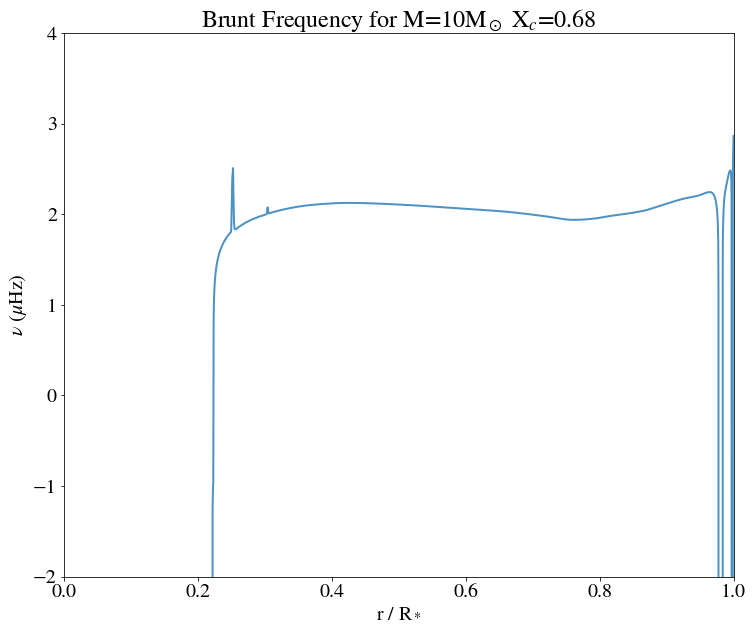

In [250]:
mesa=mr.MesaData('10/LOGS/profile2.data')
dir(mesa)
mesa.bulk_names

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))

brunt=(1e6/6.283)*10**mesa.log_brunt_N
plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=2, alpha=0.8)
plt.axis([0,1, -2,4])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\nu$ ($\mu$Hz)')
plt.title(r'Brunt Frequency for M=10M$_\odot$ X$_c$=0.68')

## Running GYRE calculations using a 10Msun MESA model
Here's the typical gyre.in file: 

```
&constants
/

&model
	model_type = 'EVOL'
	!file = 'spb.mesa'
	file = '10/LOGS/profile2.data.GYRE'
	file_format = 'MESA'
/

&mode
	l = 1
	tag = 'l=1'
/

&mode
	l = 2
	tag = 'l=2'
/

&mode
        l = 3
        tag = 'l=3'
/


&osc
	nonadiabatic = .TRUE.
/

&num
	diff_scheme = 'COLLOC_GL2' ! MAGNUS_GL2
/

&scan
	grid_type = 'INVERSE'
	freq_min_units = 'UHZ'
        freq_max_units = 'UHZ'
	freq_min = 0.01
	freq_max = 0.1
	n_freq = 50
	tag_list = 'l=1'
/

&scan
	grid_type = 'INVERSE'
	freq_min_units = 'UHZ'
	freq_max_units = 'UHZ'
	freq_min = 0.01
	freq_max = 0.1
	n_freq = 50
	tag_list = 'l=2'
/

&scan
        grid_type = 'INVERSE'
        freq_min_units = 'UHZ'
        freq_max_units = 'UHZ'
        freq_min = 0.01
        freq_max = 0.1
        n_freq = 50
        tag_list = 'l=3'
/



&grid
	n_inner = 5
	alpha_osc = 10
	alpha_exp = 2
/

&ad_output
/

&nad_output
	summary_file = '10XC068_001_01summary.txt'
	summary_file_format = 'TXT'
	summary_item_list = 'j,l,n_pg,n_p,n_g,eta,omega,freq,H'
	mode_file_format = 'TXT'
	mode_template = '10XC068_001_01mode.%J.txt'
	mode_item_list = 'j,l,n_pg,n_p,n_g,eta,omega,freq,x,f_T,xi_r,xi_h,dW_dx,dE_dx,H,L_star,T,M_r,rho,P,prop_type'
	freq_units = 'UHZ'
/

```


## Let's look at GYRE results for $\nu \in [0.1,1]$ $\mu$Hz
We plot the modes with largest H (total energy) for $\ell$ = 1,2,3

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


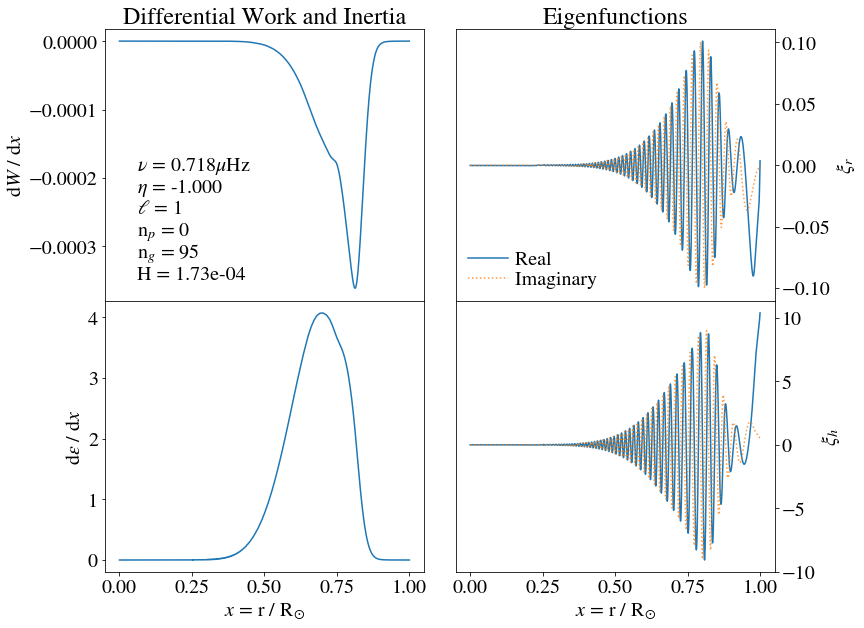

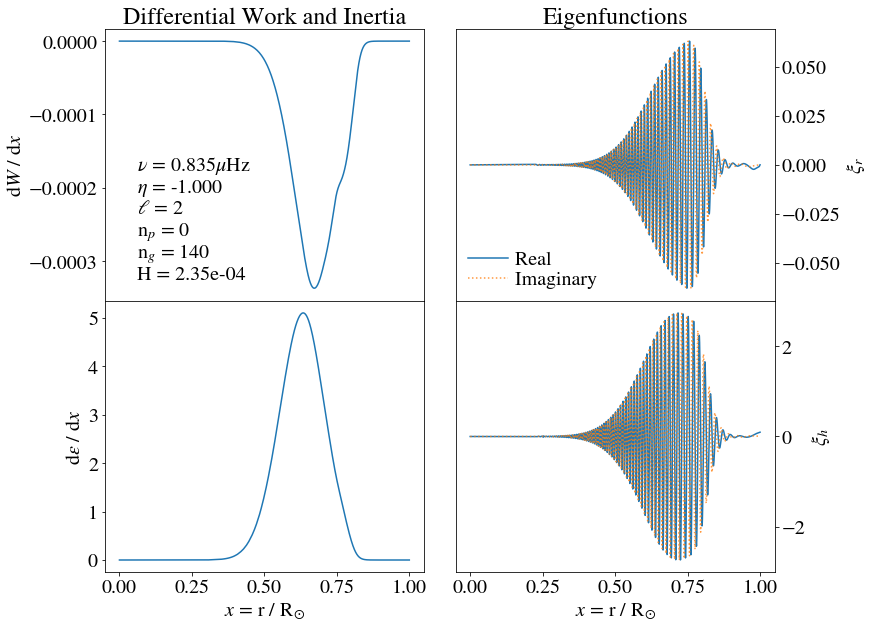

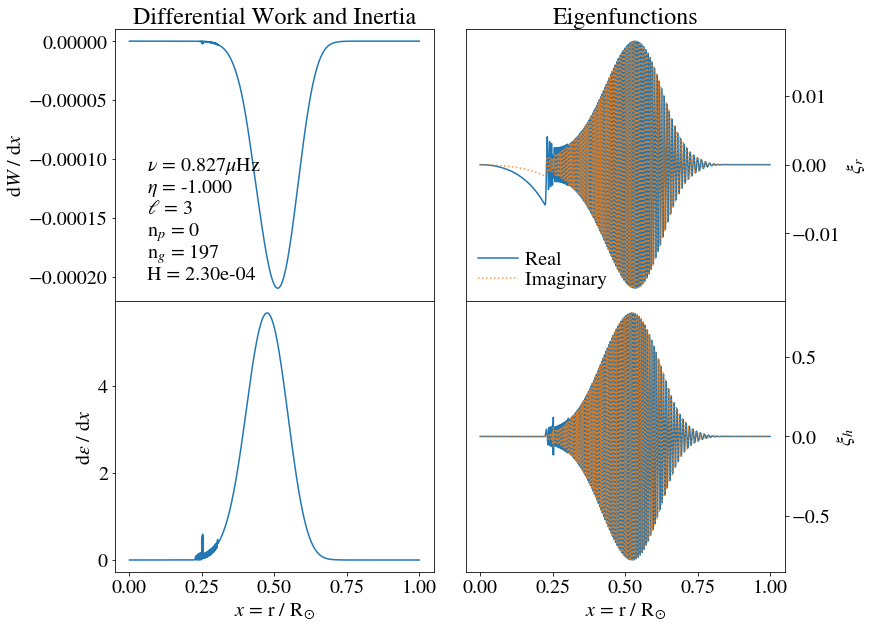

In [259]:
j=find_max_ll('modes/10XC068_01_1summary.txt',1)
inspect_modes('modes/10XC068_01_1mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_01_1summary.txt',2)
inspect_modes('modes/10XC068_01_1mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_01_1summary.txt',3)
inspect_modes('modes/10XC068_01_1mode.'+j.zfill(5)+'.txt')


## Let's look at GYRE results for $\nu \in [1,10]$ $\mu$Hz
We plot the modes with largest H (total energy) for $\ell$ = 1,2,3

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


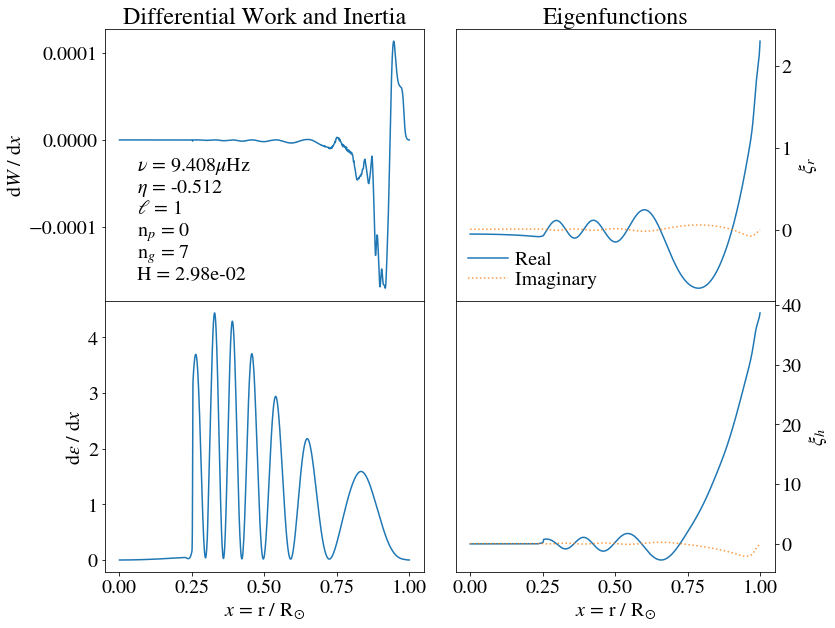

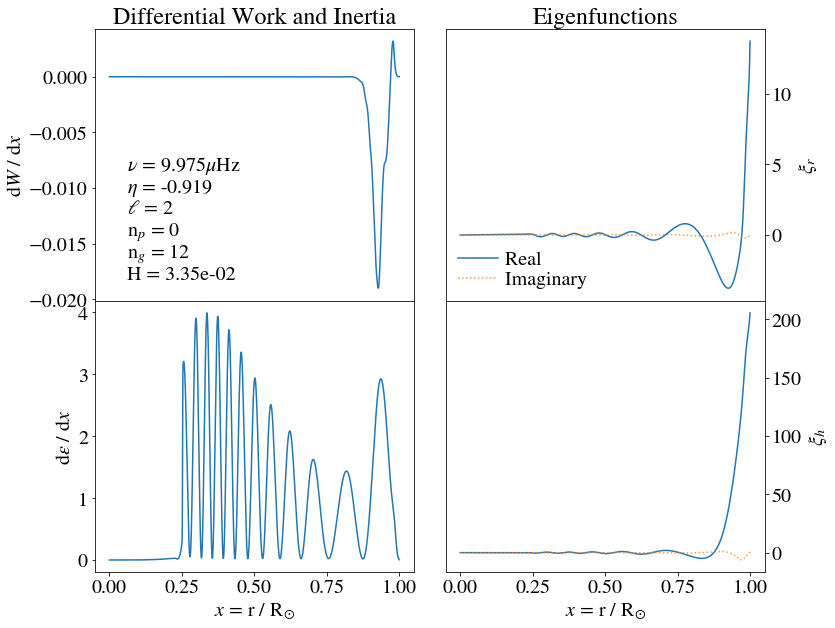

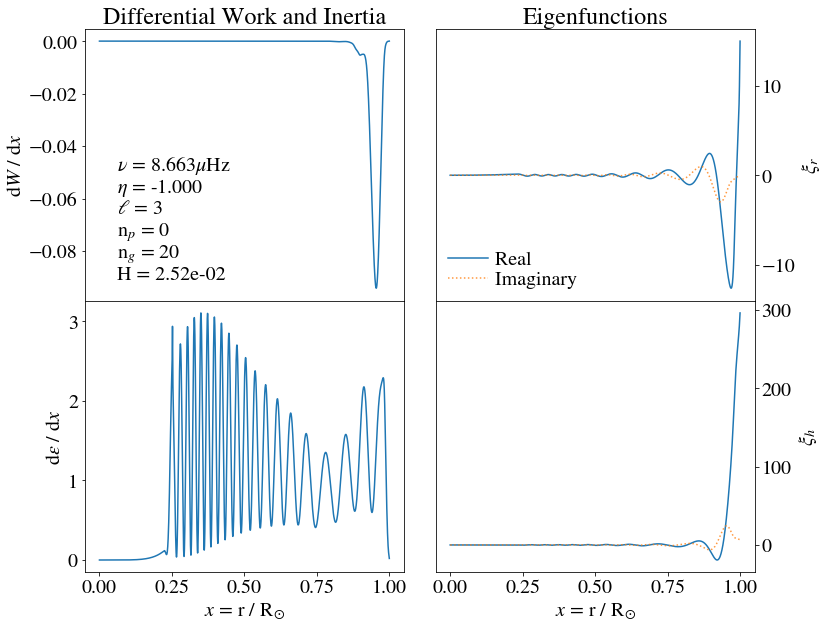

In [260]:
j=find_max_ll('modes/10XC068_1_10summary.txt',1)
inspect_modes('modes/10XC068_1_10mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_1_10summary.txt',2)
inspect_modes('modes/10XC068_1_10mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_1_10summary.txt',3)
inspect_modes('modes/10XC068_1_10mode.'+j.zfill(5)+'.txt')

## Let's look at GYRE results for $\nu \in [10,100]$ $\mu$Hz
We plot the modes with largest H (total energy) for $\ell$ = 1,2,3


//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


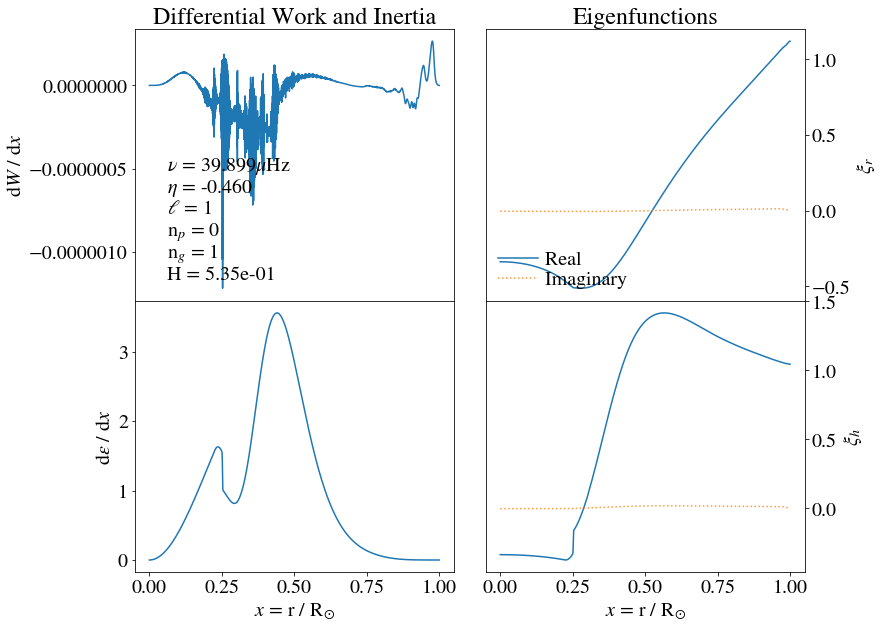

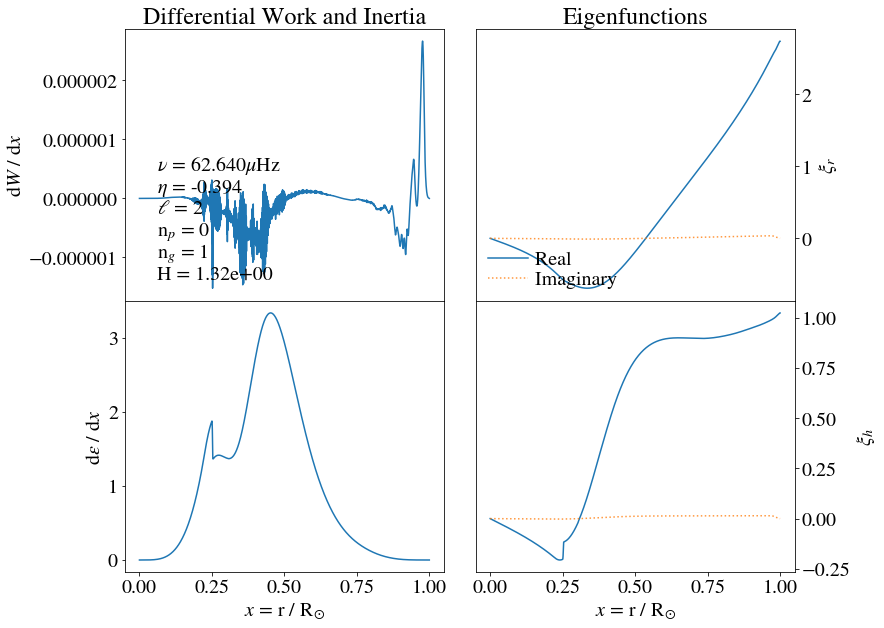

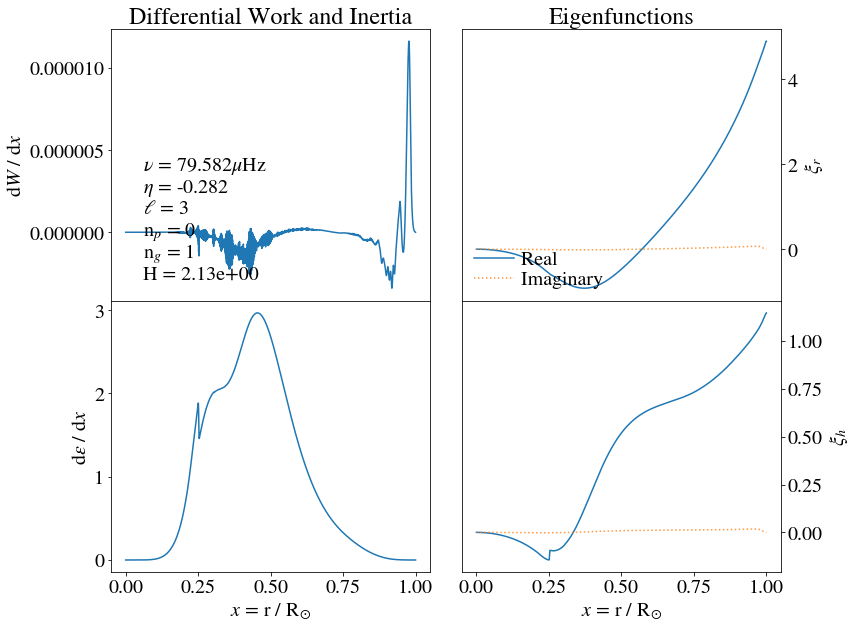

In [261]:
j=find_max_ll('modes/10XC068_10_100summary.txt',1)
inspect_modes('modes/10XC068_10_100mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_10_100summary.txt',2)
inspect_modes('modes/10XC068_10_100mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_10_100summary.txt',3)
inspect_modes('modes/10XC068_10_100mode.'+j.zfill(5)+'.txt')

## Let's look at GYRE results for  $\nu \in [100,200]$ $\mu$Hz
We plot the modes with largest H (total energy) for $\ell$ = 1,2,3
### Note these are p-modes!!!

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


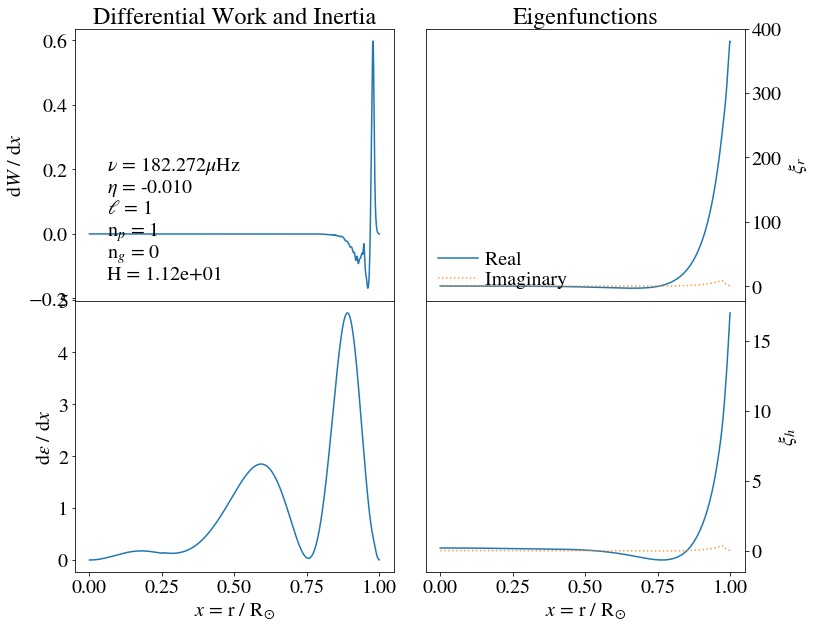

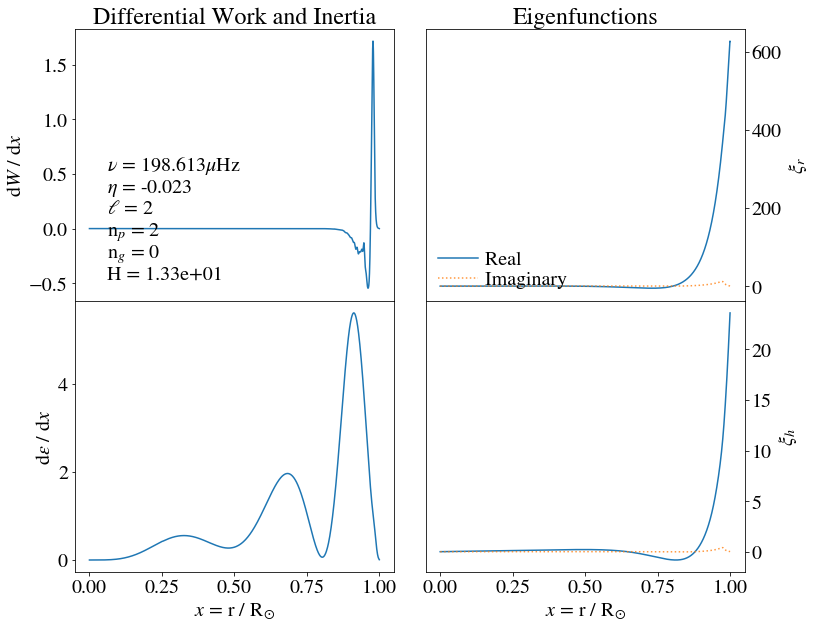

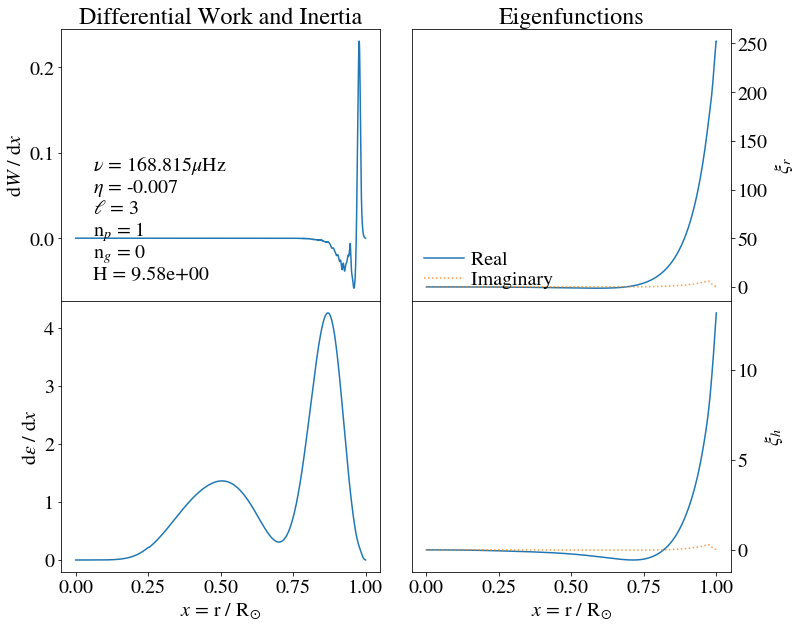

In [262]:
j=find_max_ll('modes/10XC068_100_200summary.txt',1)
inspect_modes('modes/10XC068_100_200mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_100_200summary.txt',2)
inspect_modes('modes/10XC068_100_200mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_100_200summary.txt',3)
inspect_modes('modes/10XC068_100_200mode.'+j.zfill(5)+'.txt')

## Let's look at GYRE results for $\nu \in [0.01,0.1]$ $\mu$Hz
We plot the modes with largest H (total energy) for $\ell$ = 1,2,3
These modes are not interesting. They are p-modes and their energies are tiny 

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


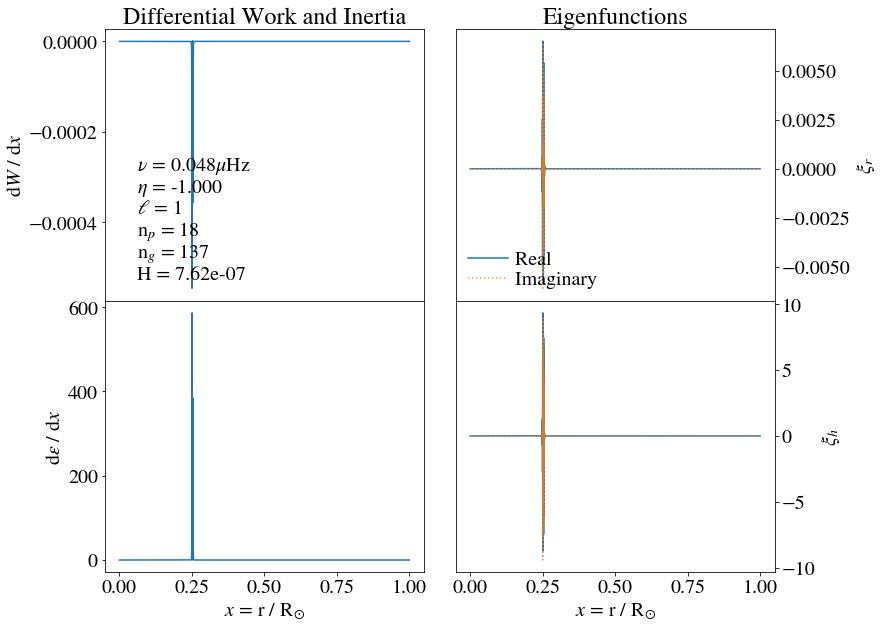

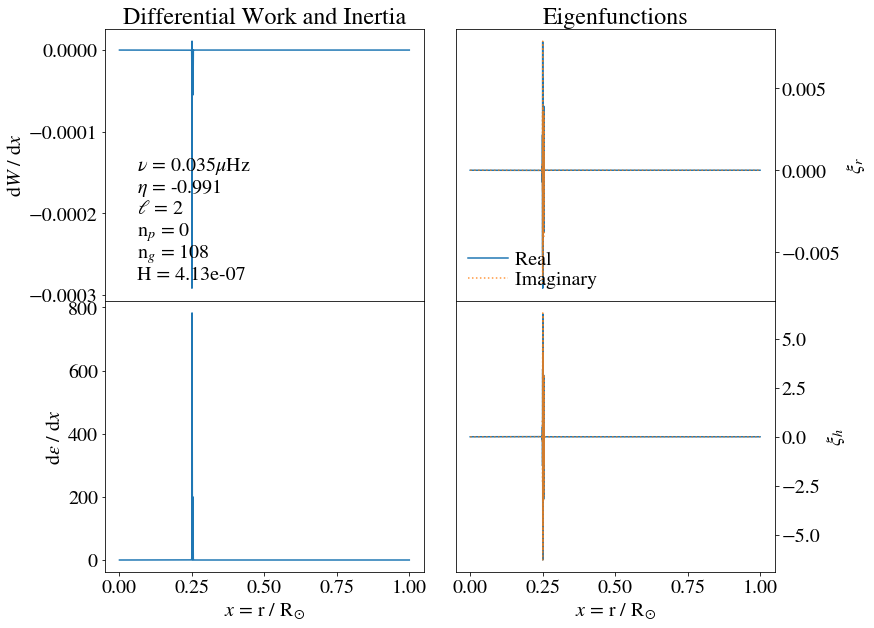

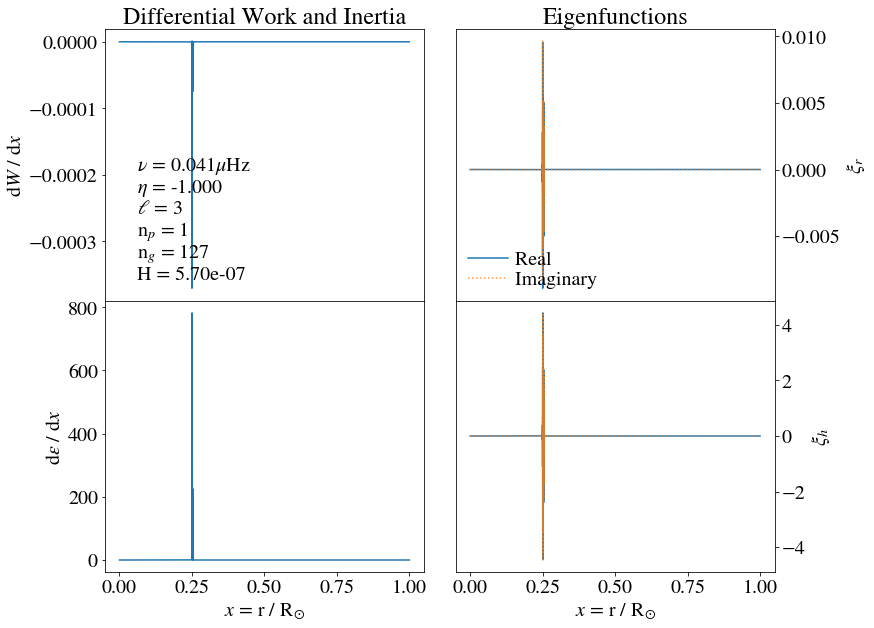

In [263]:
j=find_max_ll('modes/10XC068_001_01summary.txt',1)
inspect_modes('modes/10XC068_001_01mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_001_01summary.txt',2)
inspect_modes('modes/10XC068_001_01mode.'+j.zfill(5)+'.txt')

j=find_max_ll('modes/10XC068_001_01summary.txt',3)
inspect_modes('modes/10XC068_001_01mode.'+j.zfill(5)+'.txt')


## Let's look at some other typical modes in the 0.1-1 $\mu$Hz range

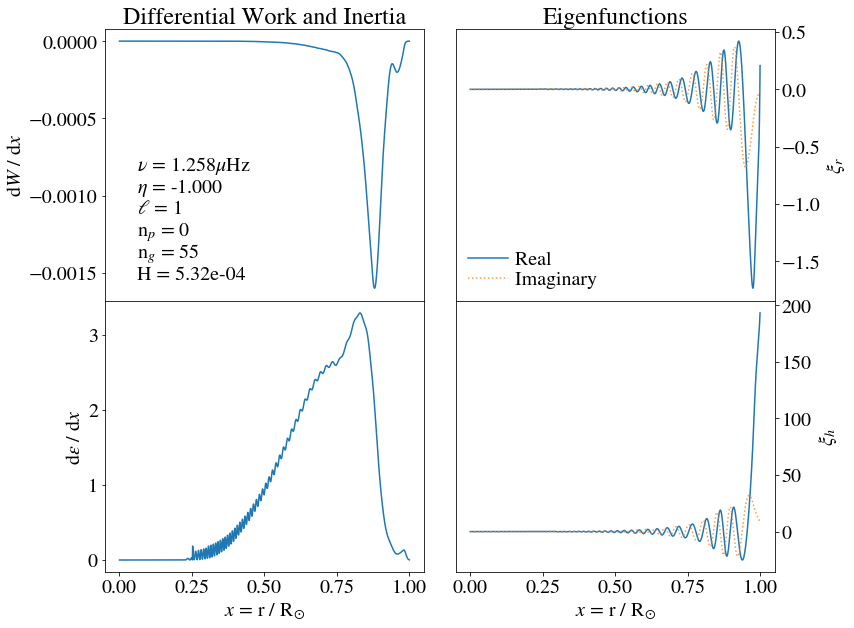

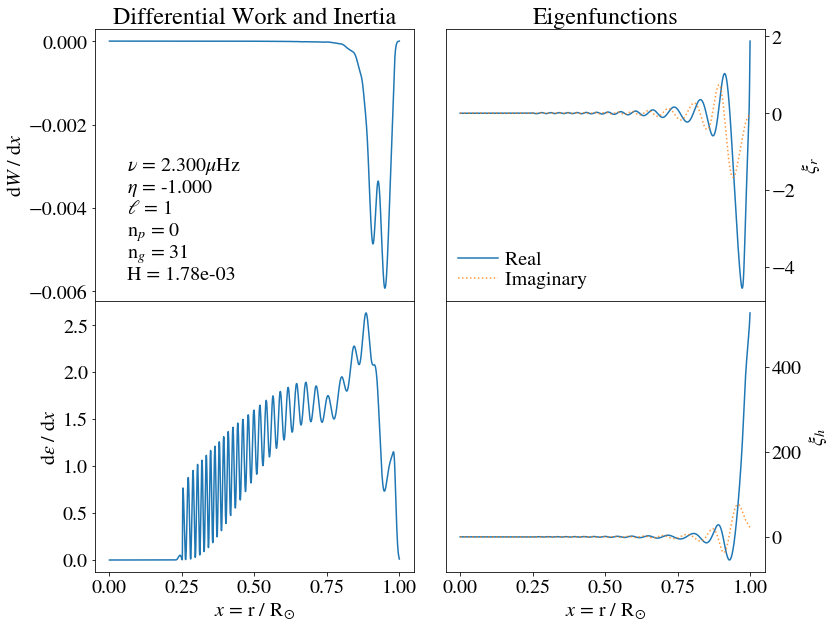

In [264]:
inspect_modes('modes/10XC068_1_10mode.00007.txt')
inspect_modes('modes/10XC068_1_10mode.00020.txt')

It seems to suggest I should look at the highest value of surface displacement, not largest mode energy

# Below I was just learning by playing with SPB stars...


In [265]:
filename='modes/summary.txt'
header, data = tomso.gyre.load_summary(filename)

data['H']
data['l']
data['eta']
data['n_g']

print(data[:][0])


(1., -76., 0., 76., -0.99986488, 0.06671942, -0.00027832, 0.00222574)


//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)


In [266]:
filename='modes/mode.00001.txt'
header, data = tomso.gyre.load_mode(filename)
print('Stellar Luminosity: ',header['L_star']/Lsun)


Stellar Luminosity:  889.3801290427821


Frequency (muHz):  0.06671942021592256
Growth rate:  -0.9998648813569739


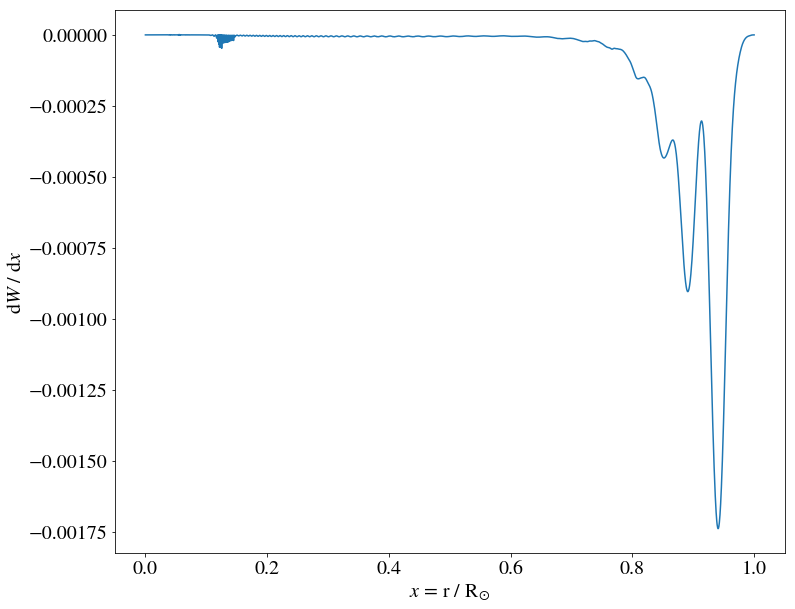

In [267]:
# Keys for the data arrays are: l,n_pg,n_p,n_g,eta,x,f_T,xi_r,xi_h,dW_dx
plt.plot(data['x'],data['dW_dx'])
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'd$W$ / d$x$')
print('Frequency (muHz): ', header['Refreq'])
print('Growth rate: ',header['eta'])

Text(0,0.5,'$\\xi_{r}$')

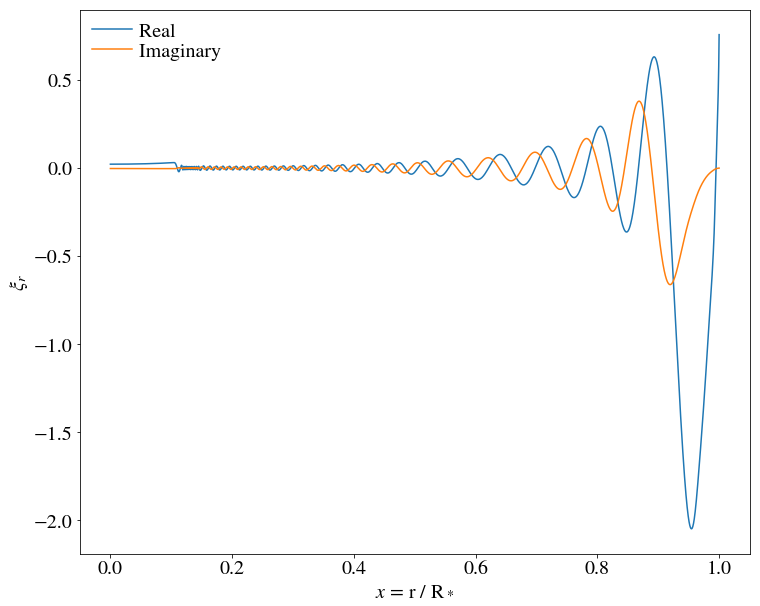

In [268]:
plt.plot(data['x'],data['Rexi_r'],label=' Real')
plt.plot(data['x'],data['Imxi_r'],label=' Imaginary')
legend = plt.legend(loc='upper left')    
#plt.plot(data['x'],data['Rexi_h'])
plt.xlabel(r'$x$ = r / R$_*$')
plt.ylabel(r'$\xi_{r}$')


Text(0,0.5,'$\\xi_{h}$')

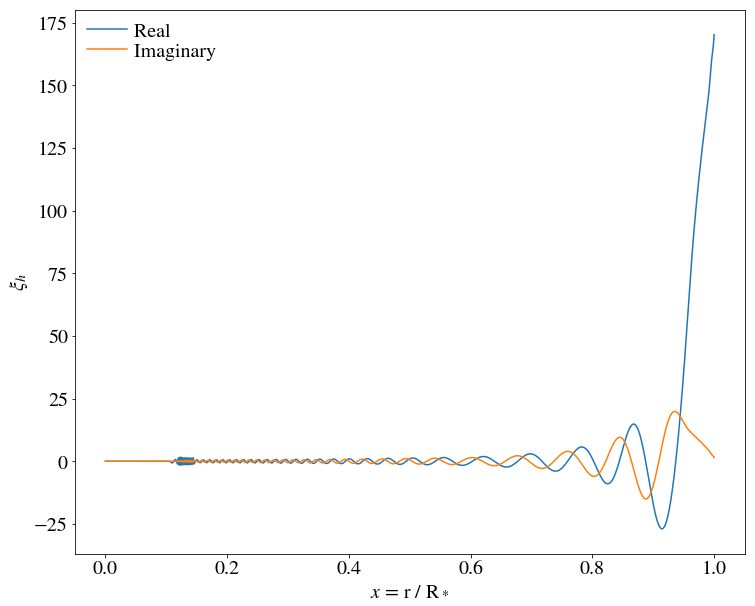

In [269]:
plt.plot(data['x'],data['Rexi_h'],label=' Real')
plt.plot(data['x'],data['Imxi_h'],label=' Imaginary')
legend = plt.legend(loc='upper left')    

#plt.plot(data['x'],data['Rexi_h'])
plt.xlabel(r'$x$ = r / R$_*$')
plt.ylabel(r'$\xi_{h}$')

Text(0,0.5,'d$\\epsilon$ / d$x$ (MR$^2$)')

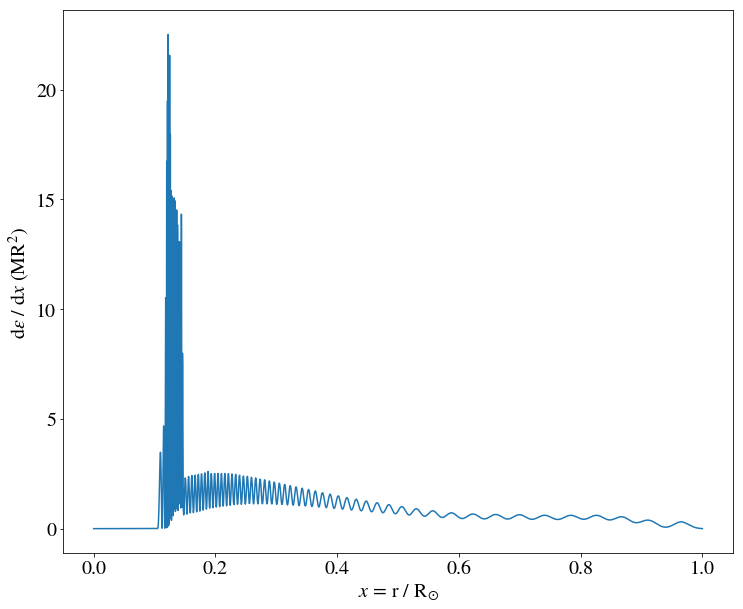

In [270]:
plt.plot(data['x'],data['dE_dx'])
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'd$\epsilon$ / d$x$ (MR$^2$)')

Text(0,0.5,'$\\log $T')

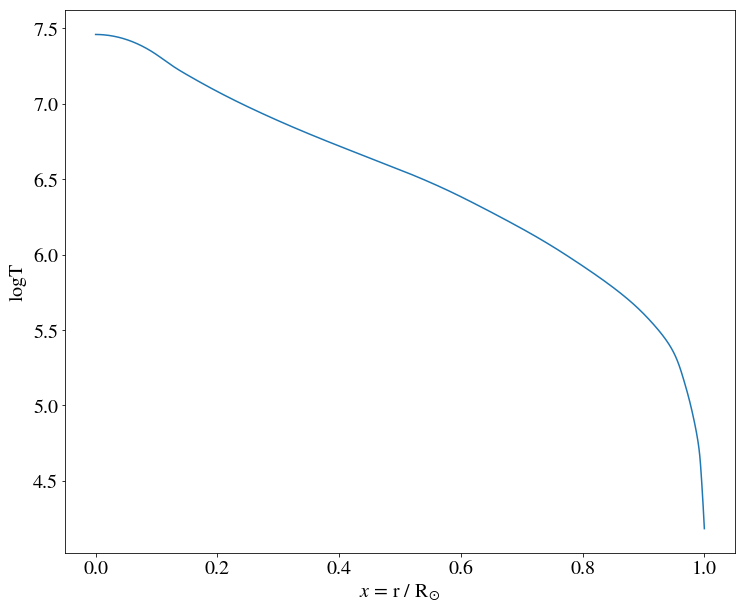

In [271]:
plt.plot(data['x'],np.log10(data['T']))
plt.xlabel(r'$x$ = r / R$_{\odot}$')
plt.ylabel(r'$\log $T')